## I. Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', '12heart.csv', 'Heart_disease_prediction.ipynb', 'README.md']


## II. Importing and understanding our dataset 

In [2]:
dataset = pd.read_csv("12heart.csv")

#### Verifying it as a 'dataframe' object in pandas

In [3]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [4]:
dataset.shape

(1327, 14)

#### Printing out a few columns

In [5]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
781,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0
229,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
562,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1
668,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
1251,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0


#### Description

In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000
mean,54.416729,0.693293,0.948003,131.615674,246.067822,0.149209,0.529766,149.217031,0.334589,1.065034,1.388847,0.748304,2.321778,0.506405
std,9.074293,0.461300,1.030241,17.521544,51.646246,0.356428,0.527219,22.973877,0.472025,1.171596,0.617343,1.028967,0.618713,0.500147
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1327 entries, 0 to 1326
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1327 non-null   int64  
 1   sex       1327 non-null   int64  
 2   cp        1327 non-null   int64  
 3   trestbps  1327 non-null   int64  
 4   chol      1327 non-null   int64  
 5   fbs       1327 non-null   int64  
 6   restecg   1327 non-null   int64  
 7   thalach   1327 non-null   int64  
 8   exang     1327 non-null   int64  
 9   oldpeak   1327 non-null   float64
 10  slope     1327 non-null   int64  
 11  ca        1327 non-null   int64  
 12  thal      1327 non-null   int64  
 13  target    1327 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 145.3 KB


In [9]:
###Luckily, we have no missing values

#### Let's understand our columns better:

In [10]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [11]:
dataset["target"].describe()

count    1327.000000
mean        0.506405
std         0.500147
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [12]:
dataset["target"].unique()

array([0, 1], dtype=int64)

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [13]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.366862
thalach     0.359352
cp          0.355568
oldpeak     0.355088
ca          0.326580
thal        0.283274
slope       0.265485
sex         0.231728
age         0.199242
trestbps    0.116412
chol        0.105822
restecg     0.100092
fbs         0.047670
Name: target, dtype: float64


In [14]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

1    672
0    655
Name: target, dtype: int64


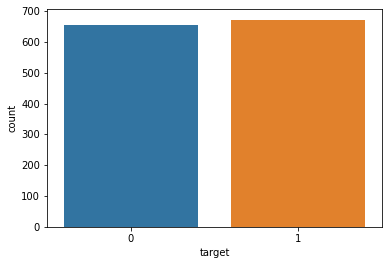

In [15]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [16]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/1328,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/1328,2)))


#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/1328))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/1328))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 49.32
Percentage of patience with heart problems: 50.6


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [17]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

##### We notice, that as expected, the 'sex' feature has 2 unique features

<AxesSubplot:xlabel='sex', ylabel='target'>

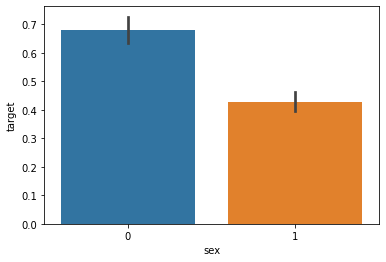

In [18]:
sns.barplot(dataset["sex"],y)

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [19]:
dataset["cp"].unique()

array([0, 1, 2, 3], dtype=int64)

##### As expected, the CP feature has values from 0 to 3

<AxesSubplot:xlabel='cp', ylabel='target'>

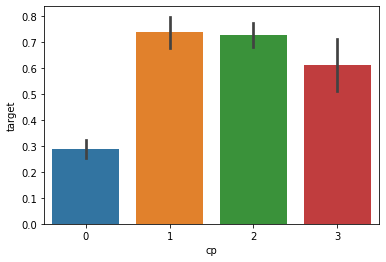

In [20]:
sns.barplot(dataset["cp"],y)

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [21]:
dataset["fbs"].describe()

count    1327.000000
mean        0.149209
std         0.356428
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fbs, dtype: float64

In [22]:
dataset["fbs"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='fbs', ylabel='target'>

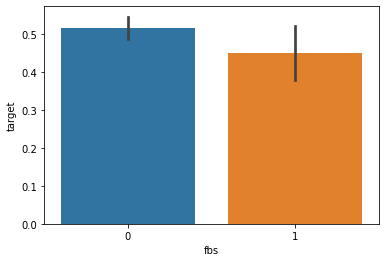

In [23]:
sns.barplot(dataset["fbs"],y)

##### Nothing extraordinary here

### Analysing the restecg feature

In [24]:
dataset["restecg"].unique()

array([1, 0, 2], dtype=int64)

<AxesSubplot:xlabel='restecg', ylabel='target'>

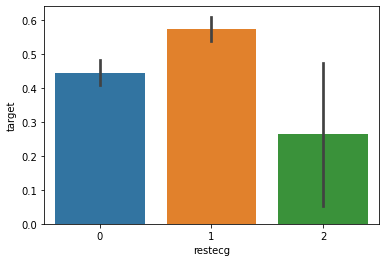

In [25]:
sns.barplot(dataset["restecg"],y)

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [26]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='exang', ylabel='target'>

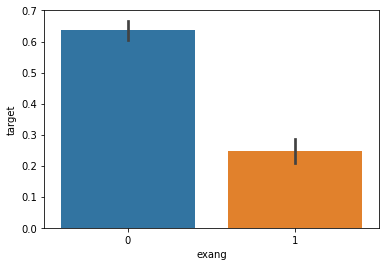

In [27]:
sns.barplot(dataset["exang"],y)

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [28]:
dataset["slope"].unique()

array([2, 0, 1], dtype=int64)

<AxesSubplot:xlabel='slope', ylabel='target'>

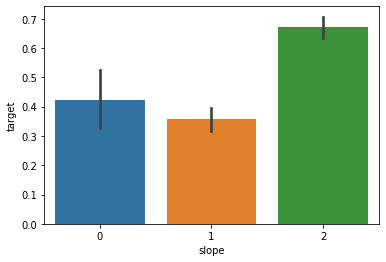

In [29]:
sns.barplot(dataset["slope"],y)

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature

In [30]:
#number of major vessels (0-3) colored by flourosopy

In [31]:
dataset["ca"].unique()

array([2, 0, 1, 3, 4], dtype=int64)

<AxesSubplot:xlabel='ca', ylabel='count'>

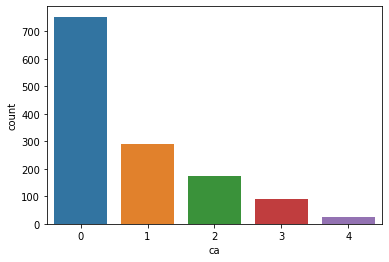

In [32]:
sns.countplot(dataset["ca"])

<AxesSubplot:xlabel='ca', ylabel='target'>

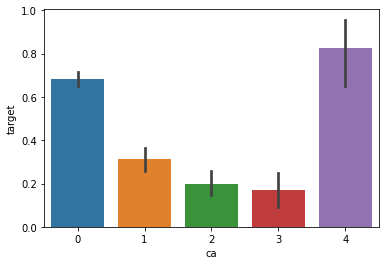

In [33]:
sns.barplot(dataset["ca"],y)

##### ca=4 has astonishingly large number of heart patients

In [34]:
### Analysing the 'thal' feature

In [35]:
dataset["thal"].unique()

array([3, 2, 1, 0], dtype=int64)

<AxesSubplot:xlabel='thal', ylabel='target'>

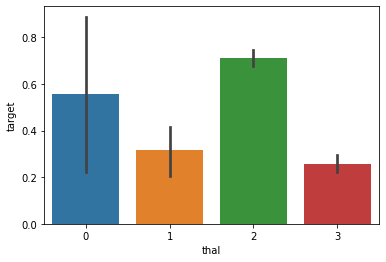

In [36]:
sns.barplot(dataset["thal"],y)

<AxesSubplot:xlabel='thal'>

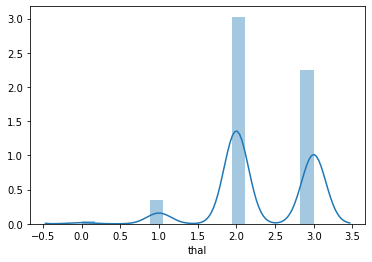

In [37]:
sns.distplot(dataset["thal"])

## IV. Train Test split

In [38]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.50,random_state=0)

In [39]:
X_train.shape

(663, 13)

In [40]:
X_test.shape

(664, 13)

In [41]:
Y_train.shape

(663,)

In [42]:
Y_test.shape

(664,)

## V. Model Fitting

In [43]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [45]:
Y_pred_lr.shape

(664,)

In [46]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 78.61 %


### Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [48]:
Y_pred_nb.shape

(664,)

In [49]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 78.16 %


### SVM

In [50]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [51]:
Y_pred_svm.shape

(664,)

In [52]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 79.22 %


### K Nearest Neighbors

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [54]:
Y_pred_knn.shape

(664,)

In [55]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.92 %


### Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [57]:
print(Y_pred_dt.shape)

(664,)


In [58]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 84.04 %


### XGBoost

In [59]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic",  eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [60]:
Y_pred_xgb.shape

(664,)

In [61]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 86.6 %


### Neural Network

In [62]:
from keras.models import Sequential
from keras.layers import Dense

In [63]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [64]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
21/21 [==============================] - 13s 1ms/step - loss: 20.8508 - accuracy: 0.4898
Epoch 2/300
21/21 [==============================] - 0s 1ms/step - loss: 6.2958 - accuracy: 0.4783
Epoch 3/300
21/21 [==============================] - 0s 1ms/step - loss: 3.1136 - accuracy: 0.4345
Epoch 4/300
21/21 [==============================] - 0s 1ms/step - loss: 2.2409 - accuracy: 0.4293
Epoch 5/300
21/21 [==============================] - 0s 1ms/step - loss: 1.5507 - accuracy: 0.4554
Epoch 6/300
21/21 [==============================] - 0s 1ms/step - loss: 1.1711 - accuracy: 0.4392
Epoch 7/300
21/21 [==============================] - 0s 1ms/step - loss: 0.8704 - accuracy: 0.5381
Epoch 8/300
21/21 [==============================] - 0s 1ms/step - loss: 0.7280 - accuracy: 0.5741
Epoch 9/300
21/21 [==============================] - 0s 1ms/step - loss: 0.6772 - accuracy: 0.6064
Epoch 10/300
21/21 [==============================] - 0s 1ms/step - loss: 0.6335 - accuracy: 0.6742
Epoch 1

Epoch 83/300
21/21 [==============================] - 0s 1ms/step - loss: 0.5283 - accuracy: 0.7486
Epoch 84/300
21/21 [==============================] - 0s 1ms/step - loss: 0.4746 - accuracy: 0.7702
Epoch 85/300
21/21 [==============================] - 0s 1ms/step - loss: 0.4825 - accuracy: 0.7819
Epoch 86/300
21/21 [==============================] - 0s 1ms/step - loss: 0.4960 - accuracy: 0.7627
Epoch 87/300
21/21 [==============================] - 0s 1ms/step - loss: 0.5173 - accuracy: 0.7561
Epoch 88/300
21/21 [==============================] - 0s 1ms/step - loss: 0.5326 - accuracy: 0.7675
Epoch 89/300
21/21 [==============================] - 0s 2ms/step - loss: 0.5128 - accuracy: 0.7723
Epoch 90/300
21/21 [==============================] - 0s 1ms/step - loss: 0.5800 - accuracy: 0.6990
Epoch 91/300
21/21 [==============================] - 0s 1ms/step - loss: 0.5457 - accuracy: 0.7439
Epoch 92/300
21/21 [==============================] - 0s 1ms/step - loss: 0.5157 - accuracy: 0.7448


21/21 [==============================] - 0s 1ms/step - loss: 0.5292 - accuracy: 0.7628
Epoch 245/300
21/21 [==============================] - 0s 1ms/step - loss: 0.4979 - accuracy: 0.7786
Epoch 246/300
21/21 [==============================] - 0s 1ms/step - loss: 0.4902 - accuracy: 0.7676
Epoch 247/300
21/21 [==============================] - 0s 1ms/step - loss: 0.5018 - accuracy: 0.7498
Epoch 248/300
21/21 [==============================] - 0s 1ms/step - loss: 0.4534 - accuracy: 0.7791
Epoch 249/300
21/21 [==============================] - 0s 1ms/step - loss: 0.4693 - accuracy: 0.7817
Epoch 250/300
21/21 [==============================] - 0s 1ms/step - loss: 0.5079 - accuracy: 0.7730
Epoch 251/300
21/21 [==============================] - 0s 1ms/step - loss: 0.4800 - accuracy: 0.7765
Epoch 252/300
21/21 [==============================] - 0s 1ms/step - loss: 0.5021 - accuracy: 0.7740
Epoch 253/300
21/21 [==============================] - 0s 1ms/step - loss: 0.4938 - accuracy: 0.7539
Epoc

In [65]:
Y_pred_nn = model.predict(X_test)

In [66]:
Y_pred_nn.shape

(664, 1)

In [67]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [68]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11. 

The accuracy score achieved using Neural Network is: 79.67 %


## VI. Output final score

In [69]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 78.61 %
The accuracy score achieved using Naive Bayes is: 78.16 %
The accuracy score achieved using Support Vector Machine is: 79.22 %
The accuracy score achieved using K-Nearest Neighbors is: 67.92 %
The accuracy score achieved using Decision Tree is: 84.04 %
The accuracy score achieved using XGBoost is: 86.6 %
The accuracy score achieved using Neural Network is: 79.67 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

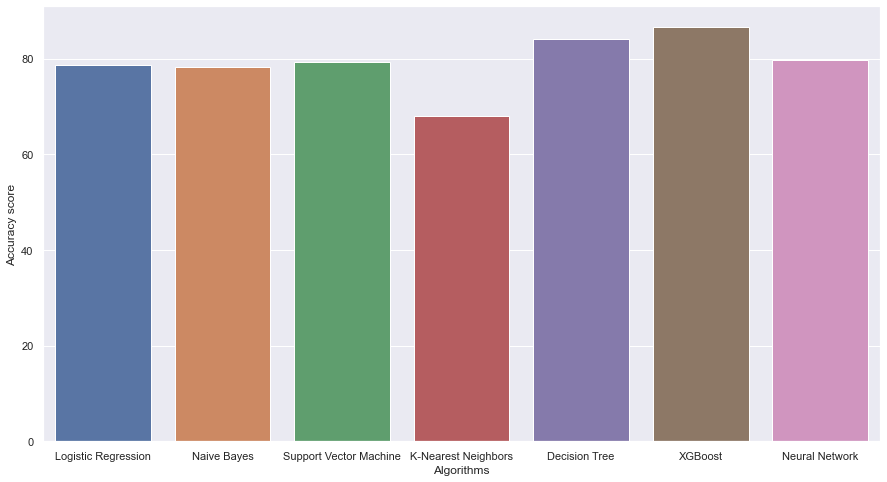

In [70]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)